<a href="https://colab.research.google.com/github/BlackPearl7703/Pytorch/blob/main/intro_to_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
2+2

4

In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [32]:
class Model(nn.Module):
  #we are trying for a exmaple of taking 4 features of a flower and guessing its class
  #4 input features , 2 hidden layers ,  output layer(3 classes of flower)
    def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
        super().__init__(); #used to instantiate out nn module
        self.fc1=nn.Linear(in_features,h1)
        self.fc2=nn.Linear(h1,h2)
        self.out=nn.Linear(h2,out_features)

    def forward(self,x):
      x=F.relu(self.fc1(x));
      x=F.relu(self.fc2(x));
      x=self.out(x);
      return x



In [35]:
torch.manual_seed(40)
model = Model()

In [34]:
#load data

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
url='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df=pd.read_csv(url)

In [3]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [17]:
#changed output values into numerics

my_df['species']=my_df['species'].replace('setosa',0.0);
my_df['species']=my_df['species'].replace('versicolor',1.0);
my_df['species']=my_df['species'].replace('virginica',2.0);

my_df


<ipython-input-17-ee2253c2f8dd>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species']=my_df['species'].replace('versicolor',1.0);


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [18]:
#convet them into what is input and what is output
x=my_df.drop('species',axis=1).values #simultaneously converting them into arrays
y=my_df['species'].values

In [19]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [21]:
#Train Test Split
from sklearn.model_selection import train_test_split


In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41);

In [37]:
#convert fetaures and output to tensors
import torch
x_train=torch.FloatTensor(x_train);
x_test=torch.FloatTensor(x_test);
y_train=torch.LongTensor(y_train);  #long tensors are 64 bit
y_test=torch.LongTensor(y_test);

In [49]:
# set criteria of model to measure the error , how far off the prediction from the data
criteria=nn.CrossEntropyLoss();
#choose  adam optimiser lr=learning rate (if error doesnot go down we will lower our lr )
optimizer =torch.optim.Adam(model.parameters(),lr=0.01); #its baically alpha value



In [45]:
model

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [55]:
#model traning
# epochs (one run of all the given train data)
epochs=1000
losses=[]
for i in range(epochs):
  i+=1
  #generate a prediction
  y_pred=model.forward(x_train)
  #calculate the loss
  loss=criteria(y_pred,y_train)
  #append the loss
  losses.append(loss.detach().numpy())

  #print every 10 epoch
  if i%10==0:
    print(f'epoch:{i} ans loss :{loss}')

  #now time for backpropagation (take the error of forward and update the weights )
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch:10 ans loss :0.023471815511584282
epoch:20 ans loss :0.02247835136950016
epoch:30 ans loss :0.02158430777490139
epoch:40 ans loss :0.020771145820617676
epoch:50 ans loss :0.020024621859192848
epoch:60 ans loss :0.019333703443408012
epoch:70 ans loss :0.018689719960093498
epoch:80 ans loss :0.018085630610585213
epoch:90 ans loss :0.017515698447823524
epoch:100 ans loss :0.016975315287709236
epoch:110 ans loss :0.016460610553622246
epoch:120 ans loss :0.01596839167177677
epoch:130 ans loss :0.015496131032705307
epoch:140 ans loss :0.01504155620932579
epoch:150 ans loss :0.014604125171899796
epoch:160 ans loss :0.014703234657645226
epoch:170 ans loss :0.014108066447079182
epoch:180 ans loss :0.013526453636586666
epoch:190 ans loss :0.013149667531251907
epoch:200 ans loss :0.012818765826523304
epoch:210 ans loss :0.01250034011900425
epoch:220 ans loss :0.012186353094875813
epoch:230 ans loss :0.011877914890646935
epoch:240 ans loss :0.011578592471778393
epoch:250 ans loss :0.01128537

Text(0.5, 0, 'epoch')

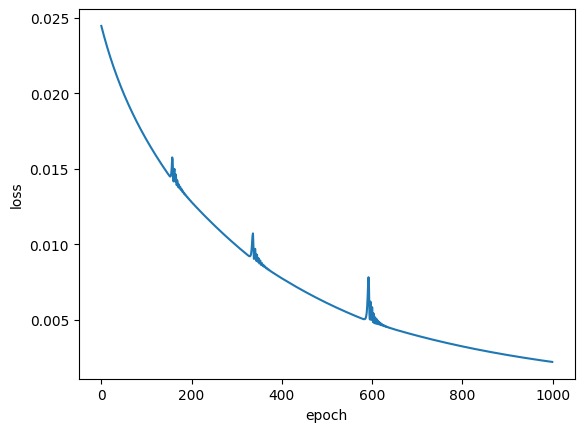

In [56]:
plt.plot(range(epochs),losses)
plt.ylabel('loss')
plt.xlabel('epoch')